In [8]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
#when combining datasets, it does matter which df you call first)
combined_city_ride_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])


# Display the data table for preview
combined_city_ride_df.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [25]:
# Obtain the x and y coordinates for each of the three city types
    #types
    #urban
    #suburban
    #rural
#Average Fare ($) Per City
#group city and get mean of total fare

#Total Number of Rides Per City
#sum rides group by city

#Total Number of Drivers Per City
#group by city and sum total drivers

#City Type (Urban, Suburban, Rural)
# notice variables are per city = group by city

#combined_city_ride_df


urban_cities = combined_city_ride_df[combined_city_ride_df["type"] == "Urban"]
suburban_cities = combined_city_ride_df[combined_city_ride_df["type"] == "Suburban"]
rural_cities = combined_city_ride_df[combined_city_ride_df["type"] == "Rural"]

urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]






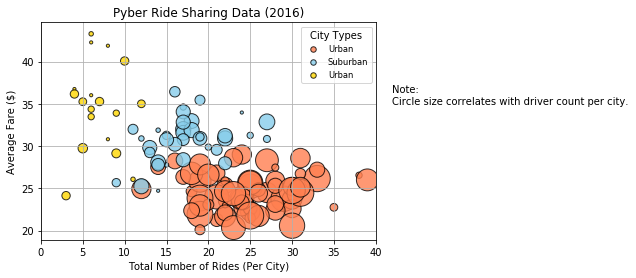

In [35]:
# Build the scatter plots for each city types
plt.scatter(urban_ride_count,
    urban_avg_fare,
    s=10*urban_driver_count,
    c="coral",
    edgecolor="black", linewidth=1,
    marker="o",
    alpha=0.8,
    label="Urban")
    
plt.scatter(suburban_ride_count,
    suburban_avg_fare,
    s=10*suburban_driver_count,
    c="skyblue",
    edgecolor="black", linewidth=1,
    marker="o",
    alpha=0.8,
    label="Suburban")

plt.scatter(rural_ride_count,
    rural_avg_fare,
    s=10*rural_driver_count,
    c="gold",
    edgecolor="black", linewidth=1,
    marker="o",
    alpha=0.8,
    label="Urban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)


# Create a legend
city_type_legend = plt.legend(fontsize="small", mode="Expanded", 
                              numpoints=1, scatterpoints=1, 
                              loc="best", title="City Types", 
                              labelspacing=0.5)

city_type_legend.legendHandles[0]._sizes = [30]
city_type_legend.legendHandles[1]._sizes = [30]
city_type_legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("Fig1.png")

#show plot
plt.show()


## Total Fares by City Type

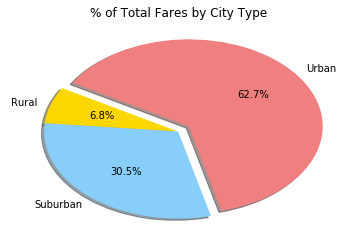

In [39]:
#combined_city_ride_df

# Calculate Type Percents
fare_percent = 100 * combined_city_ride_df.groupby(["type"]).sum()["fare"] / combined_city_ride_df["fare"].sum()

# Build Pie Chart
plt.pie(fare_percent,
       labels=["Rural", "Suburban", "Urban"],
       colors= ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("Fig2.png")

#show figure
plt.show()

## Total Rides by City Type

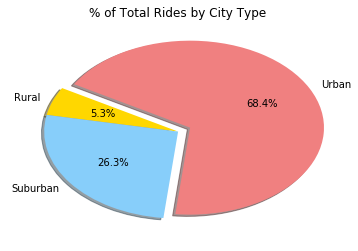

In [43]:
#combined_city_ride_df

# Calculate percent of rides
ride_percent = 100 * combined_city_ride_df.groupby(["type"]).count()["ride_id"] / combined_city_ride_df["ride_id"].count()

# Build Pie Chart
plt.pie(ride_percent,
       labels=["Rural", "Suburban", "Urban"],
       colors= ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("Fig3.png")

#show figure
plt.show()

## Total Drivers by City Type

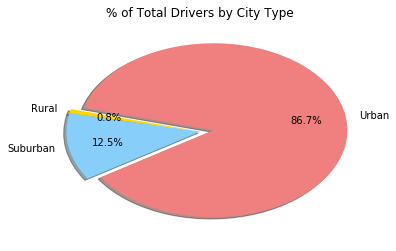

In [50]:
#combined_city_ride_df

# Calculate percent of drivers
driver_percent = 100 * combined_city_ride_df.groupby(["type"]).sum()["driver_count"] / combined_city_ride_df["driver_count"].sum()

# Build Pie Chart
plt.pie(driver_percent,
       labels=["Rural", "Suburban", "Urban"],
       colors= ["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1],
       autopct='%1.1f%%',
        pctdistance=0.70,
       shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("Fig4.png")

#show figure
plt.show()